# Imports and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
from google.colab import files
data_to_load = files.upload()
'''
# ctrl / to comment
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
circuits = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/circuits.csv', engine='python')
constructorResults = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/constructorResults.csv')
constructorStandings = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/constructorStandings.csv')
constructors = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/constructors.csv')
driverStandings = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/driverStandings.csv')
drivers = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/drivers.csv')
lapTimes = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/lapTimes.csv')
pitStops = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/pitStops.csv')
qualifying = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/qualifying.csv')
races = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/races.csv')
results = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/results.csv')
seasons = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/seasons.csv')
status = pd.read_csv('/content/drive/My Drive/DAM Assignment/F1 data/status.csv')

In [ ]:
#To see groupby objects
#for key, item in podium:
#    print(podium.get_group(key), "\n\n")

def merge(cols,lists):
    data = lists[0][cols[0]].copy()
    for i in range(len(lists)-1):
        data = data.merge(lists[i+1][cols[i+1]])
    return data

def to_minutes(sec):
    time = []
    for i in sec:
        minutes, seconds = divmod(i / 1000, 60)
        time.append(f'{minutes:0>2.0f}:{seconds:.3f}')
    return time
    
def to_ms(time):
    ms = 0
    min = int(time[:2])*60000
    sec = int(time[3:5])*1000
    ms = min + sec + int(time[6:9])
    return ms

# DAM EDA questions:

- grid position analysis
- Best "getaway" grid start position

### Nationality Constructor analysis (Done)

Output: nationality and position

In [ ]:
cols = [['raceId','constructorId','points'],
        ['constructorId','nationality'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [constructorResults,constructors,races,circuits]
data = merge(cols,lists)

not_0 = data.groupby('nationality')['points'].sum().reset_index()
not_0 = not_0.loc[not_0['points'] != 0]
data = data.loc[data['nationality'].isin(not_0['nationality'])].sort_values(['nationality'])

In [ ]:
data

,raceId,constructorId,points,nationality,year,circuitId,name
11141,755,106,0.0,American,1960,60,Riverside International Raceway
5386,950,210,0.0,American,2016,17,Shanghai International Circuit
5241,575,67,0.0,American,1976,16,Fuji Speedway
10138,557,67,0.0,American,1977,46,Watkins Glen
10152,574,67,1.0,American,1976,46,Watkins Glen
...,...,...,...,...,...,...,...
3387,869,15,20.0,Swiss,2012,10,Hockenheimring
653,128,15,5.0,Swiss,2002,4,Circuit de Barcelona-Catalunya
3399,909,15,0.0,Swiss,2014,10,Hockenheimring
3941,170,15,0.0,Swiss,2000,13,Circuit de Spa-Francorchamps


we merged the data to get nationality and points. Using points, we get the total sum, mean and total number of race

In [ ]:
nationality.head()

,nationality,sum,mean,count
0,American,156.0,1.006452,155
1,Austrian,3888.5,15.871429,245
2,Brazilian,44.0,0.369748,119
3,British,14466.5,2.751855,5257
4,Canadian,79.0,1.215385,65


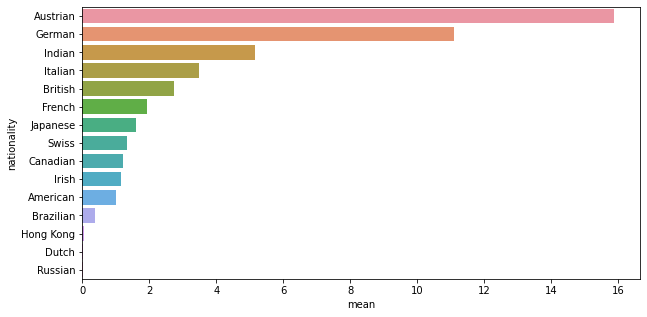

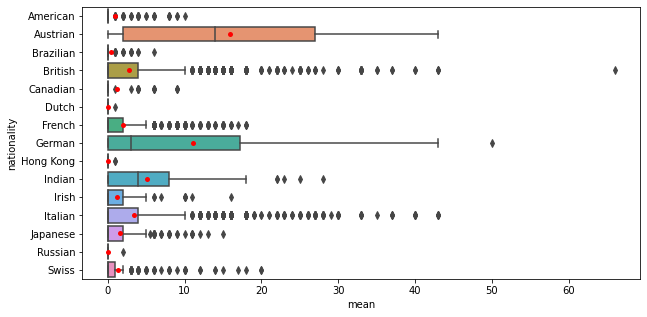

In [ ]:
nationality = data.groupby('nationality')['points'].agg([np.sum, np.mean, 'count']).reset_index()

plt.figure(figsize=(10,5))
ax = sns.barplot(data = nationality.sort_values(['mean'], ascending = False), x = "mean", y = "nationality")

plt.figure(figsize=(10,5))
sns.boxplot(data = data, x = 'points', y = 'nationality')
sns.swarmplot(data = nationality, x = 'mean', y = 'nationality', color = 'red')
plt.show()

From this graph we can see that Austrian has the highest mean points followed by German


In [ ]:
cols = [['raceId','constructorId','position'],
        ['constructorId','nationality'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [constructorStandings,constructors,races,circuits]
data = merge(cols,lists).sort_values(['nationality'])

In [ ]:
data

,raceId,constructorId,position,nationality,year,circuitId,name
5123,687,190,7,American,1967,14,Autodromo Nazionale di Monza
10364,546,67,10,American,1977,43,Long Beach
1566,669,190,13,American,1968,6,Circuit de Monaco
10107,549,67,11,American,1977,40,Zolder
10497,547,67,10,American,1977,45,Jarama
...,...,...,...,...,...,...,...
2577,281,15,8,Swiss,1993,9,Silverstone Circuit
2563,264,15,6,Swiss,1994,9,Silverstone Circuit
8169,272,15,8,Swiss,1994,29,Adelaide Street Circuit
828,930,15,5,Swiss,2015,4,Circuit de Barcelona-Catalunya


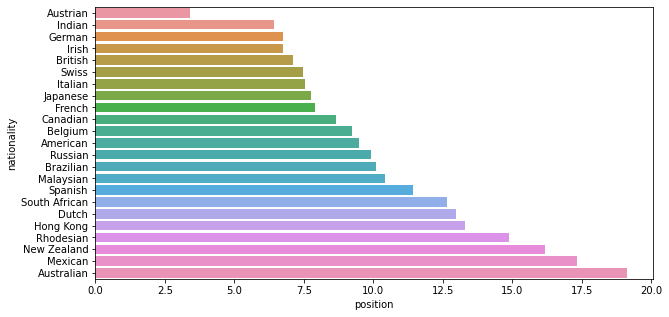

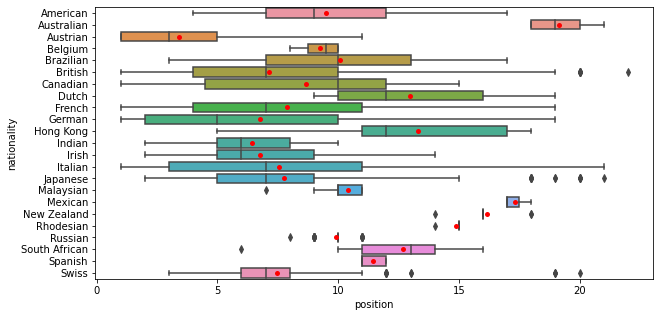

In [ ]:
position = data.groupby(['nationality'])['position'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data = position.sort_values(['position']), x = 'position', y = 'nationality')

plt.figure(figsize=(10,5))
sns.boxplot(data = data, x = 'position', y = 'nationality')
sns.swarmplot(data = position, x = 'position', y = 'nationality', color = 'red')

We then try to confirm if position would reflect a similar graph. Since having better positions in race would generate more points. We can see that Austrian is top once again for lower mean position

### Best F1 Drivers (Done)
Output: podium and year


In [ ]:
cols = [['raceId','driverId','position'],
        ['driverId','driverRef'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [driverStandings,drivers,races,circuits]
data = merge(cols,lists)

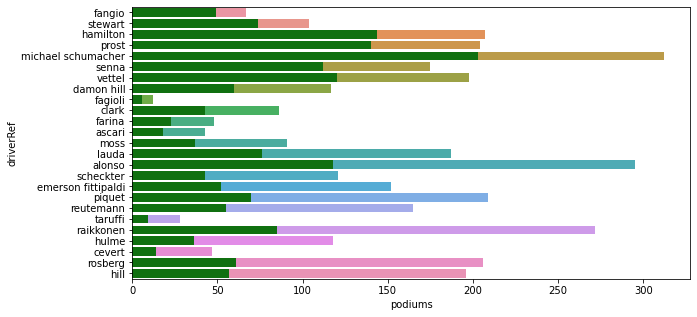

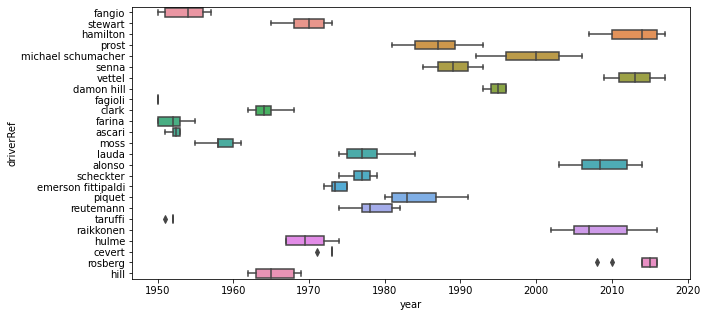

In [ ]:
career = data.groupby('driverRef')['year'].agg(['min', 'max', 'count']).reset_index()

podium = data.loc[data['position'] <= 3]
podium = podium.groupby(['driverRef'])['position'].count().reset_index().rename(columns = {'position': 'podiums'})
podium = podium.merge(career)
podium['podium_ratio'] = podium['podiums']/podium['count']
podium = podium.sort_values(['podium_ratio'], ascending = False).head(25)

plt.figure(figsize=(10,5))
sns.barplot(data = podium, x = 'count', y = 'driverRef')
sns.barplot(data = podium, x = 'podiums', y = 'driverRef', color = 'green')

year = podium['driverRef'].reset_index().merge(data.loc[data['position'] <= 3])
plt.figure(figsize=(10,5))
sns.boxplot(data = year, x = 'year', y = 'driverRef')
plt.show()

Michael Schumacher has the highest podium counts but if we sort it against to podium ratio using the formula 
### number of times on the podium / total number of race taken
fangio would have the highest podium ratio

### Which circuits have the highest overtaking frequency? (more chances for drivers to improve grid position during the race)?
Output: overtake









In [ ]:
data = lapTimes.groupby('raceId')
count = []

for i in data:
    freq = -1
    race = i[1].groupby('lap')
    for j in race:
        position = j[1]['position']
        if (freq == -1):
            diff = 1
        else:
            diff = (position.reset_index()['position']-prev.reset_index()['position']).abs().sum()
        prev = position
        freq += diff
    count.append(freq)

KeyboardInterrupt: ignored

In [ ]:
overtake = data.count().reset_index()
overtake['freq'] = count

cols = [['raceId','freq'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [overtake,races,circuits]
overtake = merge(cols,lists)

overtake = overtake.groupby('name')
overtake['freq'].agg([np.mean, 'count']).reset_index().sort_values(['mean'], ascending = False)

In [ ]:
data = lapTimes[['raceId','lap','position']].merge(races[['raceId','year']])
data = data.loc[data['year'] >= 2014]
data = data.groupby('raceId')

count = []

for i in data:
    freq = -1
    race = i[1].groupby('lap')
    for j in race:
        position = j[1]['position']
        if (freq == -1):
            diff = 1
        else:
            diff = (position.reset_index()['position']-prev.reset_index()['position']).abs().sum()
        prev = position
        freq += diff
    count.append(freq)

overtake = data.count().reset_index()
overtake['freq'] = count

cols = [['raceId','freq'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [overtake,races,circuits]
overtake = merge(cols,lists)

overtake = overtake.groupby('name')
#overtakep['freq'].mean().reset_index().sort_values(['freq'], ascending = False)
overtake['freq'].agg([np.mean, 'count']).reset_index().sort_values(['mean'], ascending = False)

### Average lapspeed for each circuit / track (Done)
Output: lapspeed and lapspeed_overall

In [ ]:
cols = [['raceId','lap','milliseconds'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [lapTimes,races,circuits]
data = merge(cols,lists).rename(columns = {'milliseconds': 'time'})
distance = data.groupby('name')['lap'].max().reset_index()

#monaco grand prix set at 260.5 km instead of 305km
distance['distance'] = 305/distance['lap']
distance.loc[distance['name'] == 'Circuit de Monaco', ['distance']] = 260.5/distance['lap']

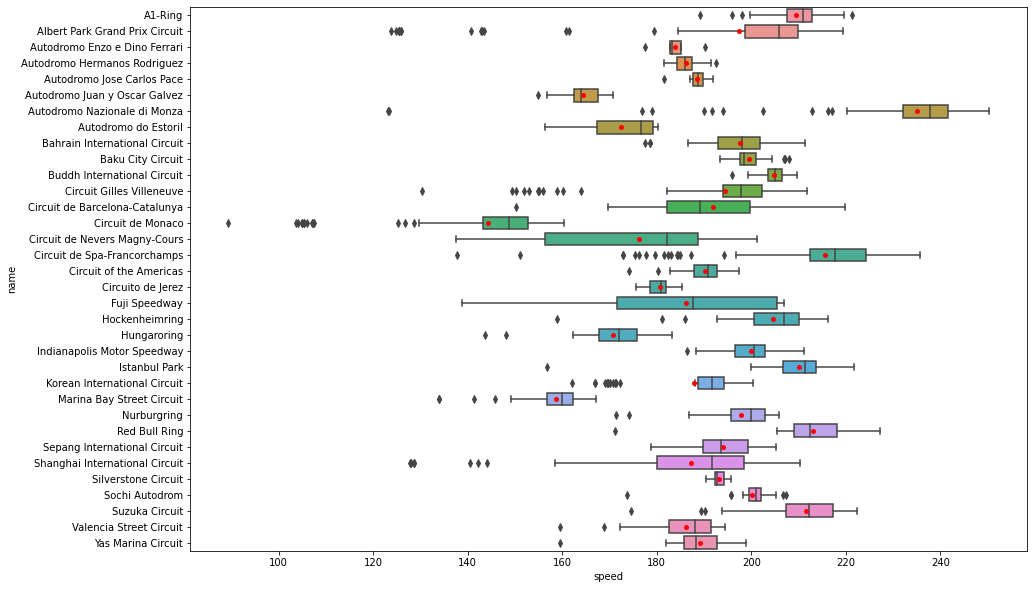

In [ ]:
lapspeed_overall = data.merge(distance).sort_values(['name'])
lapspeed_overall['speed'] = lapspeed_overall['distance'] *3600000 / lapspeed_overall['time']
lapspeed = lapspeed_overall.groupby(['name'])['speed'].mean().reset_index()
plt.figure(figsize=(15,10))
sns.boxplot(data = lapspeed_overall, x = 'speed', y = 'name')
sns.swarmplot(data = lapspeed, x = 'speed', y = 'name', color = 'red')

### Did the F1 cars get slower after the hybrid era (2014)?
or isit 2009

Output: hybrid

In [ ]:
data = lapTimes.groupby('raceId')['milliseconds'].mean().reset_index()

cols = [['raceId','milliseconds'],
        ['raceId','year','circuitId'],
        ['circuitId','name']]
lists = [data,races,circuits]
data = merge(cols,lists)

In [ ]:
yoc = 2014
hybrid_before = data.loc[data['year'] < yoc]
hybrid_after = data.loc[data['year'] >= yoc]

hybrid_before = hybrid_before.groupby('name')['milliseconds'].mean().reset_index().rename(columns = {'milliseconds': 'before'})
hybrid_after = hybrid_after.groupby('name')['milliseconds'].mean().reset_index().rename(columns = {'milliseconds': 'after'})

hybrid = hybrid_before.merge(hybrid_after)
hybrid['change_ms'] = hybrid['after'] - hybrid['before']
hybrid['before'] = to_minutes(hybrid['before'])
hybrid['after'] = to_minutes(hybrid['after'])

In [ ]:
hybrid

,name,before,after,change_ms
0,Albert Park Grand Prix Circuit,01:38.147,01:41.037,2890.014875
1,Autodromo Jose Carlos Pace,01:23.027,01:37.032,14005.405444
2,Autodromo Nazionale di Monza,01:30.421,01:29.872,-548.909284
3,Bahrain International Circuit,01:41.491,01:42.128,637.196131
4,Circuit Gilles Villeneuve,01:32.204,01:21.887,-10316.519232
5,Circuit de Barcelona-Catalunya,01:29.026,01:32.950,3923.393660
6,Circuit de Monaco,01:29.160,01:26.781,-2378.847039
7,Circuit de Spa-Francorchamps,02:1.944,02:4.309,2364.999529
8,Circuit of the Americas,01:46.359,01:49.731,3371.466728
9,Hockenheimring,01:33.547,01:24.168,-9379.034238


### which tracks have the highest frequency of collisions and accidents?
Output: collision

In [ ]:
cols = [['raceId','statusId'],
        ['statusId','status'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [results,status,races,circuits]
data = merge(cols,lists)

#status['status'].unique()
list_accident = ['Accident','Collision']

collision = data.loc[data['status'].isin(list_accident)]
collision = collision.groupby('name')['status'].count().reset_index().sort_values(['status'], ascending = False)

In [ ]:
collision

,name,status
24,Circuit de Monaco,186
27,Circuit de Spa-Francorchamps,93
11,Autodromo Nazionale di Monza,89
50,Nurburgring,85
19,Circuit Gilles Villeneuve,84
...,...,...
57,Riverside International Raceway,1
34,Fair Park,1
60,Sebring International Raceway,1
14,Baku City Circuit,1


### Do constructors and drivers perform better in their home country?

In [ ]:
#have to manually match circuits.location to drivers.nationality and constructors.nationality

### Drivers performance/consistency
Output: consistency

In [ ]:
#driver laptime standard deviation on each track?
cols = [['raceId','driverId','milliseconds'],
        ['driverId','driverRef'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [lapTimes,drivers,races,circuits]
data = merge(cols,lists)

consistency = data.groupby(['name','driverRef'])['milliseconds'].std().reset_index()
consistency = consistency.groupby('driverRef')['milliseconds'].mean().reset_index().sort_values(['milliseconds'])

In [ ]:
consistency

,driverRef,milliseconds
62,lavaggi,5431.707683
12,brendon hartley,6761.459181
8,berger,7078.316930
74,merhi,7393.595881
34,gasly,7455.522164
...,...,...
56,kobayashi,68638.752010
38,grassi,69391.382454
47,ide,70612.045782
67,markus winkelhock,362530.287546


### Pitstops analysis for each track


*   avg number of pitstops for each track
*   avg time taken for each track
*   avg lap for first pitstop and ...


In [ ]:
cols = [['raceId','driverId','stop','lap','milliseconds'],
        ['raceId','circuitId'],
        ['circuitId','name']]
lists = [pitStops,races,circuits]
data = merge(cols,lists)

In [ ]:
avg_pitstop = data.groupby(['raceId','driverId','name'])['stop'].max().reset_index()
avg_pitstop = avg_pitstop.groupby('name')['stop'].mean().reset_index().sort_values(['stop'], ascending = False)

In [ ]:
avg_pitstop

,name,stop
14,Istanbul Park,3.565217
2,Autodromo Jose Carlos Pace,2.920863
16,Marina Bay Street Circuit,2.910959
20,Shanghai International Circuit,2.709459
8,Circuit de Barcelona-Catalunya,2.709459
13,Hungaroring,2.701987
19,Sepang International Circuit,2.654930
4,Bahrain International Circuit,2.629032
12,Hockenheimring,2.611940
17,Nurburgring,2.465116




```
### Grid position analysis

*
```



In [14]:
dropped_races = races[['raceId', 'year', 'circuitId', 'name']].loc[races['year'] > 2003]
dropped_results = results.drop(['resultId', 'number', 'position', 'positionText'], 1).rename(columns = {'grid': 'startingGrid'})

def merge(list):
    merged_data = list[0].copy()
    for i in range(len(list)-1):
        merged_data = merged_data.merge(list[i+1])
    return merged_data

list = [dropped_races, dropped_results, status]
merged_data = merge(list)
merged_data['classAttribute'] = (merged_data.positionOrder < 11).astype(int)
merged_data

,raceId,year,circuitId,name,driverId,constructorId,startingGrid,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,classAttribute
0,1,2009,1,Australian Grand Prix,18,23,1,1,10.0,58,34:15.8,5655784.0,17.0,3.0,01:28.0,216.891,1,Finished,1
1,1,2009,1,Australian Grand Prix,22,23,2,2,8.0,58,0.807,5656591.0,43.0,14.0,01:29.1,214.344,1,Finished,1
2,1,2009,1,Australian Grand Prix,15,7,20,3,6.0,58,1.604,5657388.0,50.0,10.0,01:28.9,214.706,1,Finished,1
3,1,2009,1,Australian Grand Prix,10,7,19,4,5.0,58,4.435,5660219.0,53.0,6.0,01:28.4,215.92,1,Finished,1
4,1,2009,1,Australian Grand Prix,4,4,10,5,4.0,58,4.879,5660663.0,53.0,9.0,01:28.7,215.199,1,Finished,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,961,2016,14,Italian Grand Prix,826,5,16,19,0.0,36,NaN,NaN,35.0,17.0,01:28.0,236.886,84,Battery,0
5667,976,2017,73,Azerbaijan Grand Prix,826,5,11,19,0.0,9,NaN,NaN,9.0,18.0,01:48.4,199.372,84,Battery,0
5668,983,2017,2,Malaysian Grand Prix,8,6,0,20,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,84,Battery,0
5669,976,2017,73,Azerbaijan Grand Prix,815,10,6,15,0.0,39,NaN,NaN,37.0,8.0,01:45.6,204.67,136,Seat,0
